
IMAGE SIZE STATISTICS
Total Images: 405
Max Size:     480x330
Min Size:     480x330
Average Size: 480x330

✅ PERFECT CONSISTENCY: All images are exactly the same size.


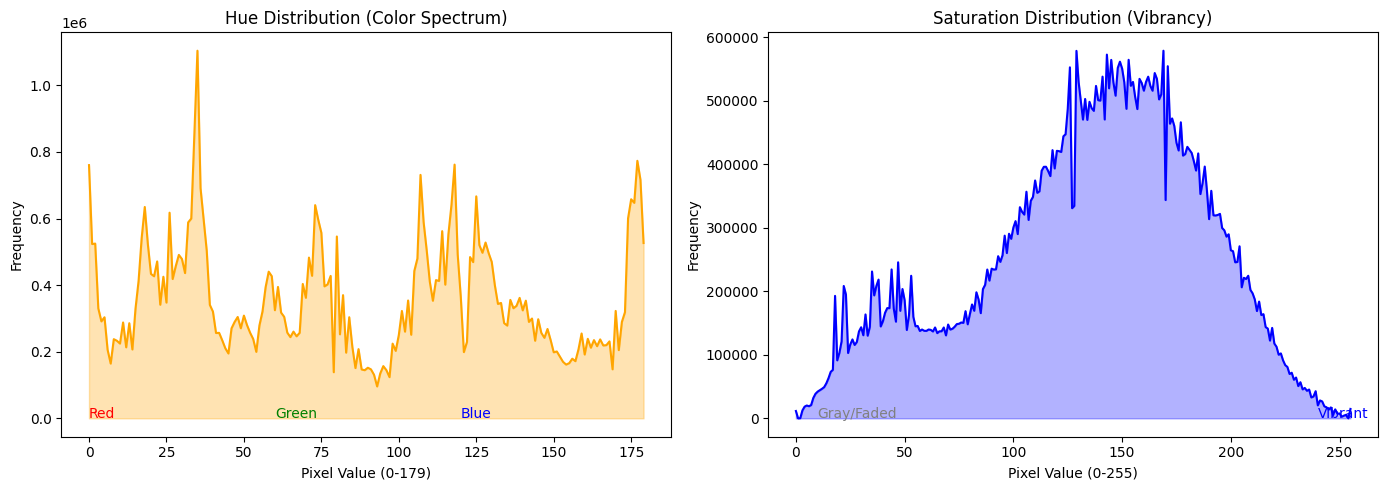

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v19-ori-shape.yolov8\\shapes"  # <--- REPLACE THIS
  # <--- REPLACE THIS with your folder path
FILE_EXTENSION = "*.jpg"                # Change to *.png if needed
# =================================================


def analyze_color_distribution():
    # Get list of all images
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found! Check your path.")
        return

    # Arrays to store accumulated histograms
    hue_hist_acc = np.zeros((180, 1)) # Hue is 0-179 in OpenCV
    sat_hist_acc = np.zeros((256, 1)) # Saturation is 0-255

    print(f"Processing {len(image_paths)} images for Color Analysis...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        # Convert BGR (OpenCV default) to HSV
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        # Calculate Histogram for Hue (Channel 0) and Saturation (Channel 1)
        hue_hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        sat_hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])

        # Accumulate
        hue_hist_acc += hue_hist
        sat_hist_acc += sat_hist

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Hue Plot
    ax1.plot(hue_hist_acc, color='orange')
    ax1.set_title('Hue Distribution (Color Spectrum)')
    ax1.set_xlabel('Pixel Value (0-179)')
    ax1.set_ylabel('Frequency')
    ax1.fill_between(range(180), hue_hist_acc.flatten(), color='orange', alpha=0.3)
    ax1.text(0, 0, "Red", color='red')
    ax1.text(60, 0, "Green", color='green')
    ax1.text(120, 0, "Blue", color='blue')

    # Saturation Plot
    ax2.plot(sat_hist_acc, color='blue')
    ax2.set_title('Saturation Distribution (Vibrancy)')
    ax2.set_xlabel('Pixel Value (0-255)')
    ax2.set_ylabel('Frequency')
    ax2.fill_between(range(256), sat_hist_acc.flatten(), color='blue', alpha=0.3)
    ax2.text(10, 0, "Gray/Faded", color='gray')
    ax2.text(240, 0, "Vibrant", color='blue')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_color_distribution()

Processing 405 images for Brightness/Contrast...


C:\Users\junha\AppData\Local\Temp\ipykernel_46244\2941830673.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\junha\AppData\Local\Temp\ipykernel_46244\2941830673.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


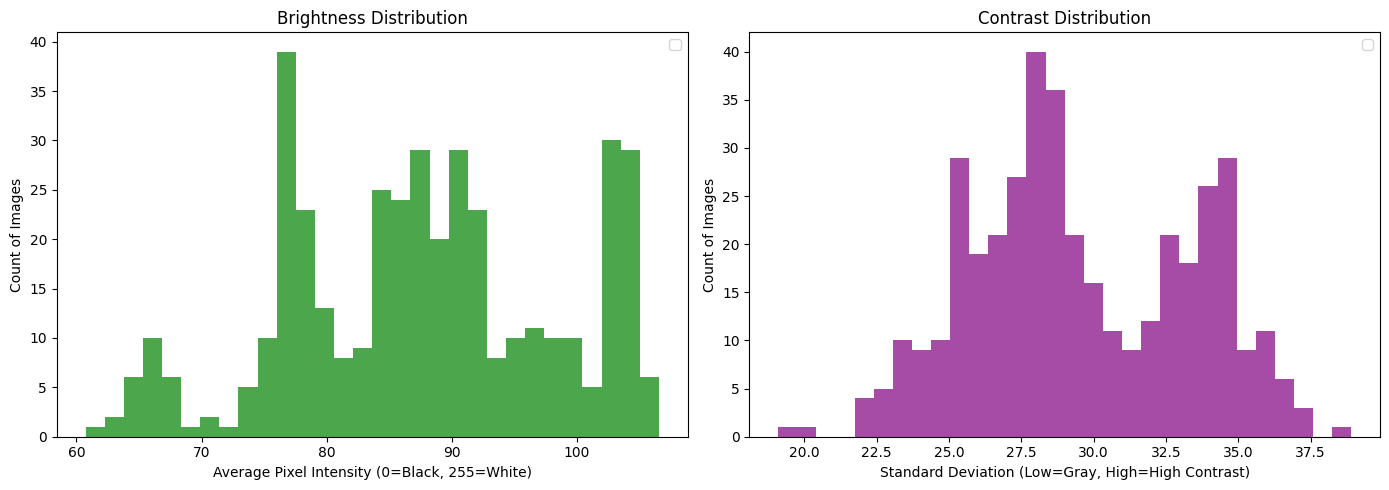


No extreme outliers found.


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v19-ori-shape.yolov8\\shapes"  # <--- REPLACE THIS
  # <--- REPLACE THIS
FILE_EXTENSION = "*.jpg"
# =================================================

def analyze_brightness_contrast():
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found!")
        return

    brightness_values = []
    contrast_values = []
    problematic_images = []

    print(f"Processing {len(image_paths)} images for Brightness/Contrast...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        # Convert to Grayscale for simple intensity calculation
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate Metrics
        mean_brightness = np.mean(gray)
        std_contrast = np.std(gray)

        brightness_values.append(mean_brightness)
        contrast_values.append(std_contrast)


    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Brightness
    ax1.hist(brightness_values, bins=30, color='green', alpha=0.7)
    ax1.set_title('Brightness Distribution')
    ax1.set_xlabel('Average Pixel Intensity (0=Black, 255=White)')
    ax1.set_ylabel('Count of Images')
    ax1.legend()

    # Contrast
    ax2.hist(contrast_values, bins=30, color='purple', alpha=0.7)
    ax2.set_title('Contrast Distribution')
    ax2.set_xlabel('Standard Deviation (Low=Gray, High=High Contrast)')
    ax2.set_ylabel('Count of Images')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Report Outliers
    if problematic_images:
        print("\n--- POTENTIAL ISSUES FOUND ---")
        for name, issue, val in problematic_images[:10]: # Print top 10
            print(f"Image: {name} | Issue: {issue} | Value: {val:.2f}")
    else:
        print("\nNo extreme outliers found.")

if __name__ == "__main__":
    analyze_brightness_contrast()

Starting analysis...
Processing 401 images...


100%|██████████| 401/401 [00:00<00:00, 580.15it/s]


Graph saved as intensity_check.png


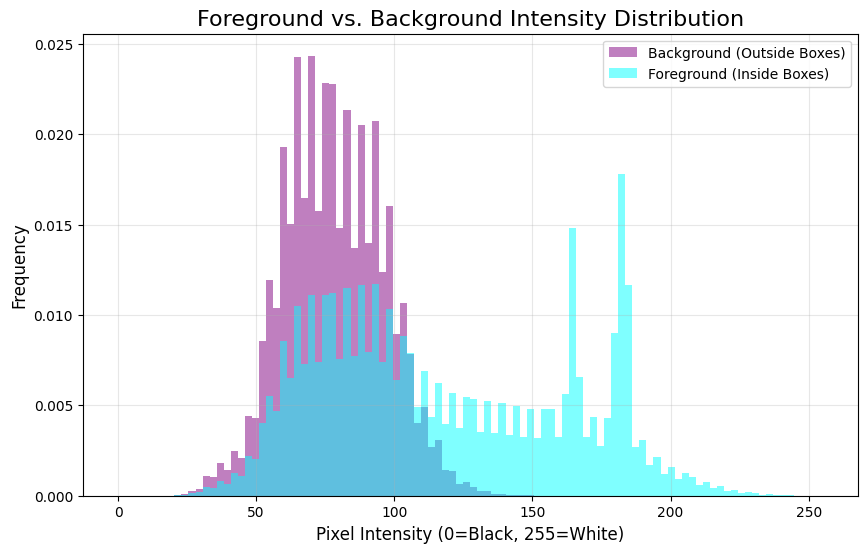

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm if you don't have it

# ================= CONFIGURATION =================
# Path to your images and labels
IMAGE_DIR = "C:/Users/junha/OneDrive/Desktop/FYP/final-shape-dataset/ori-all-images"
LABEL_DIR = "C:/Users/junha/OneDrive/Desktop/FYP/final-shape-dataset/ori-all-labels"   # e.g., "dataset/labels" (YOLO format .txt)
# =================================================

def get_pixel_intensities():
    foreground_pixels = []
    background_pixels = []

    # Get list of image files
    image_files = [f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    print(f"Processing {len(image_files)} images...")

    for img_file in tqdm(image_files):
        # Construct paths
        img_path = os.path.join(IMAGE_DIR, img_file)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(LABEL_DIR, label_file)

        # Load Image and Convert to Grayscale
        img = cv2.imread(img_path)
        if img is None: continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        h, w = gray.shape

        # Create a mask for Foreground (initially all black/background)
        # 0 = Background, 255 = Foreground
        mask = np.zeros_like(gray, dtype=np.uint8)

        # Check if label file exists
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    # Parse YOLO format: class x_center y_center width height
                    # All values are normalized 0-1
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        _, x_c, y_c, bw, bh = map(float, parts[:5])
                        
                        # Convert normalized coordinates to pixel coordinates
                        x1 = int((x_c - bw / 2) * w)
                        y1 = int((y_c - bh / 2) * h)
                        x2 = int((x_c + bw / 2) * w)
                        y2 = int((y_c + bh / 2) * h)
                        
                        # Clamp coordinates to image boundaries
                        x1, y1 = max(0, x1), max(0, y1)
                        x2, y2 = min(w, x2), min(h, y2)

                        # Mark this region as Foreground (White)
                        cv2.rectangle(mask, (x1, y1), (x2, y2), 255, -1)

        # Extract pixels based on mask
        fg_pixels = gray[mask == 255].flatten()
        bg_pixels = gray[mask == 0].flatten()

        # To save memory, we can just take a random sample if the dataset is huge
        # But for 400 images, appending all is usually fine.
        if len(fg_pixels) > 0:
            foreground_pixels.append(fg_pixels)
        if len(bg_pixels) > 0:
            background_pixels.append(bg_pixels)

    # Flatten the list of arrays into one giant array
    if foreground_pixels:
        all_fg = np.concatenate(foreground_pixels)
    else:
        all_fg = np.array([])
        
    if background_pixels:
        all_bg = np.concatenate(background_pixels)
    else:
        all_bg = np.array([])

    return all_fg, all_bg

def plot_distributions(fg, bg):
    plt.figure(figsize=(10, 6))
    
    # Plot Background Histogram
    plt.hist(bg, bins=100, range=(0, 255), density=True, 
             color='purple', alpha=0.5, label='Background (Outside Boxes)')
    
    # Plot Foreground Histogram
    plt.hist(fg, bins=100, range=(0, 255), density=True, 
             color='cyan', alpha=0.5, label='Foreground (Inside Boxes)')

    plt.title('Foreground vs. Background Intensity Distribution', fontsize=16)
    plt.xlabel('Pixel Intensity (0=Black, 255=White)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    output_file = 'intensity_check.png'
    plt.savefig(output_file)
    print(f"Graph saved as {output_file}")
    plt.show()

# Run the analysis
if __name__ == "__main__":
    print("Starting analysis...")
    fg_data, bg_data = get_pixel_intensities()
    
    if len(fg_data) == 0:
        print("Error: No foreground labels found. Check your paths and .txt files.")
    else:
        plot_distributions(fg_data, bg_data)

Processing 405 images for Blur Detection...


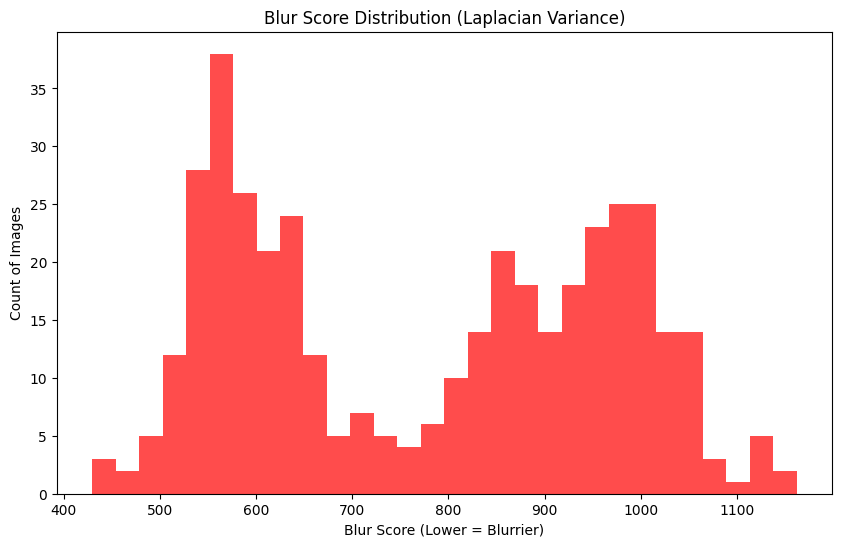

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v19-ori-shape.yolov8\\shapes"  # <--- REPLACE THIS

FILE_EXTENSION = "*.jpg"
# =================================================

def variance_of_laplacian(image):
    # Compute the Laplacian of the image and then return the variance
    return cv2.Laplacian(image, cv2.CV_64F).var()

def analyze_blur():
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found!")
        return

    blur_scores = []
    blurriest_images = []

    print(f"Processing {len(image_paths)} images for Blur Detection...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Calculate Blur Score
        score = variance_of_laplacian(gray)
        blur_scores.append(score)
        

    # Sort images by blur score (lowest score = most blurry)
    blurriest_images.sort(key=lambda x: x[0])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(blur_scores, bins=30, color='red', alpha=0.7)
    plt.title('Blur Score Distribution (Laplacian Variance)')
    plt.xlabel('Blur Score (Lower = Blurrier)')
    plt.ylabel('Count of Images')
    

if __name__ == "__main__":
    analyze_blur()

Scanning 401 label files...


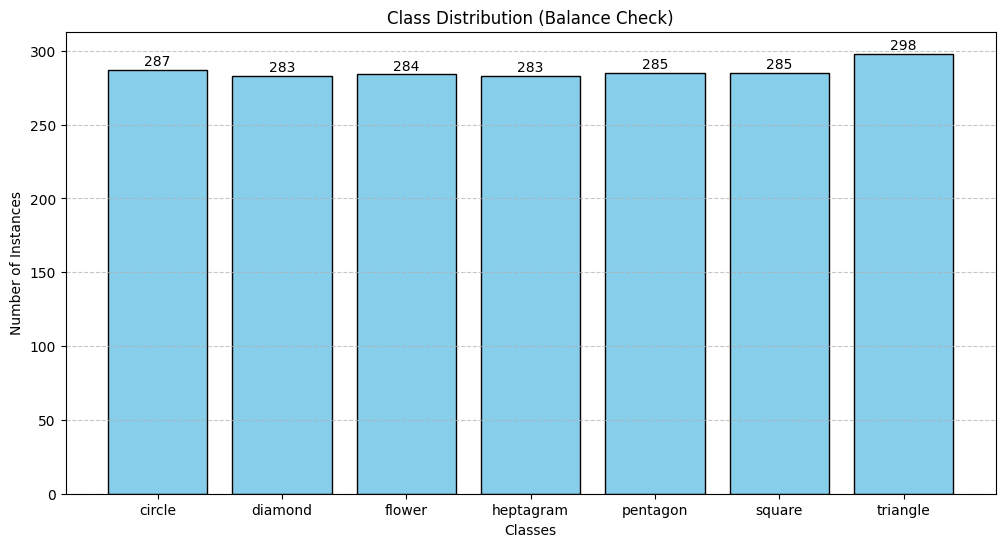

In [12]:
import matplotlib.pyplot as plt
import os
import glob
from collections import Counter

# ================= CONFIGURATION =================
LABEL_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v19-ori-shape.yolov8\\all_labels"  # <--- REPLACE THIS
# Update this list to match your classes.txt or data.yaml order
CLASS_NAMES = ['circle', 'diamond', 'flower', 'heptagram', 'pentagon', 'square', 'triangle']
# =================================================

def plot_class_distribution():
    label_files = glob.glob(os.path.join(LABEL_FOLDER, "*.txt"))
    
    if not label_files:
        print("No label files found! Check your path.")
        return

    class_counts = Counter()

    print(f"Scanning {len(label_files)} label files...")

    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0:
                    class_id = int(parts[0])
                    class_counts[class_id] += 1

    # Prepare data for plotting
    # Ensure all classes are represented even if count is 0
    counts = [class_counts.get(i, 0) for i in range(len(CLASS_NAMES))]
    
    # Plotting
    plt.figure(figsize=(12, 6))
    bars = plt.bar(CLASS_NAMES, counts, color='skyblue', edgecolor='black')
    
    # Add numbers on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

    plt.title('Class Distribution (Balance Check)')
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

if __name__ == "__main__":
    plot_class_distribution()

Scanning 401 label files...

Class Name      | Count  | Mean W   | Mean H   | Aspect Ratio (W/H)   | Consistency (Std)
-----------------------------------------------------------------------------------------------
circle          | 287    | 0.170    | 0.246    | 0.692                | 0.019          
diamond         | 283    | 0.158    | 0.230    | 0.718                | 0.216          
flower          | 284    | 0.181    | 0.263    | 0.691                | 0.035          
heptagram       | 283    | 0.185    | 0.267    | 0.694                | 0.029          
pentagon        | 285    | 0.178    | 0.259    | 0.690                | 0.038          
square          | 285    | 0.180    | 0.260    | 0.693                | 0.021          
triangle        | 298    | 0.195    | 0.282    | 0.694                | 0.060          



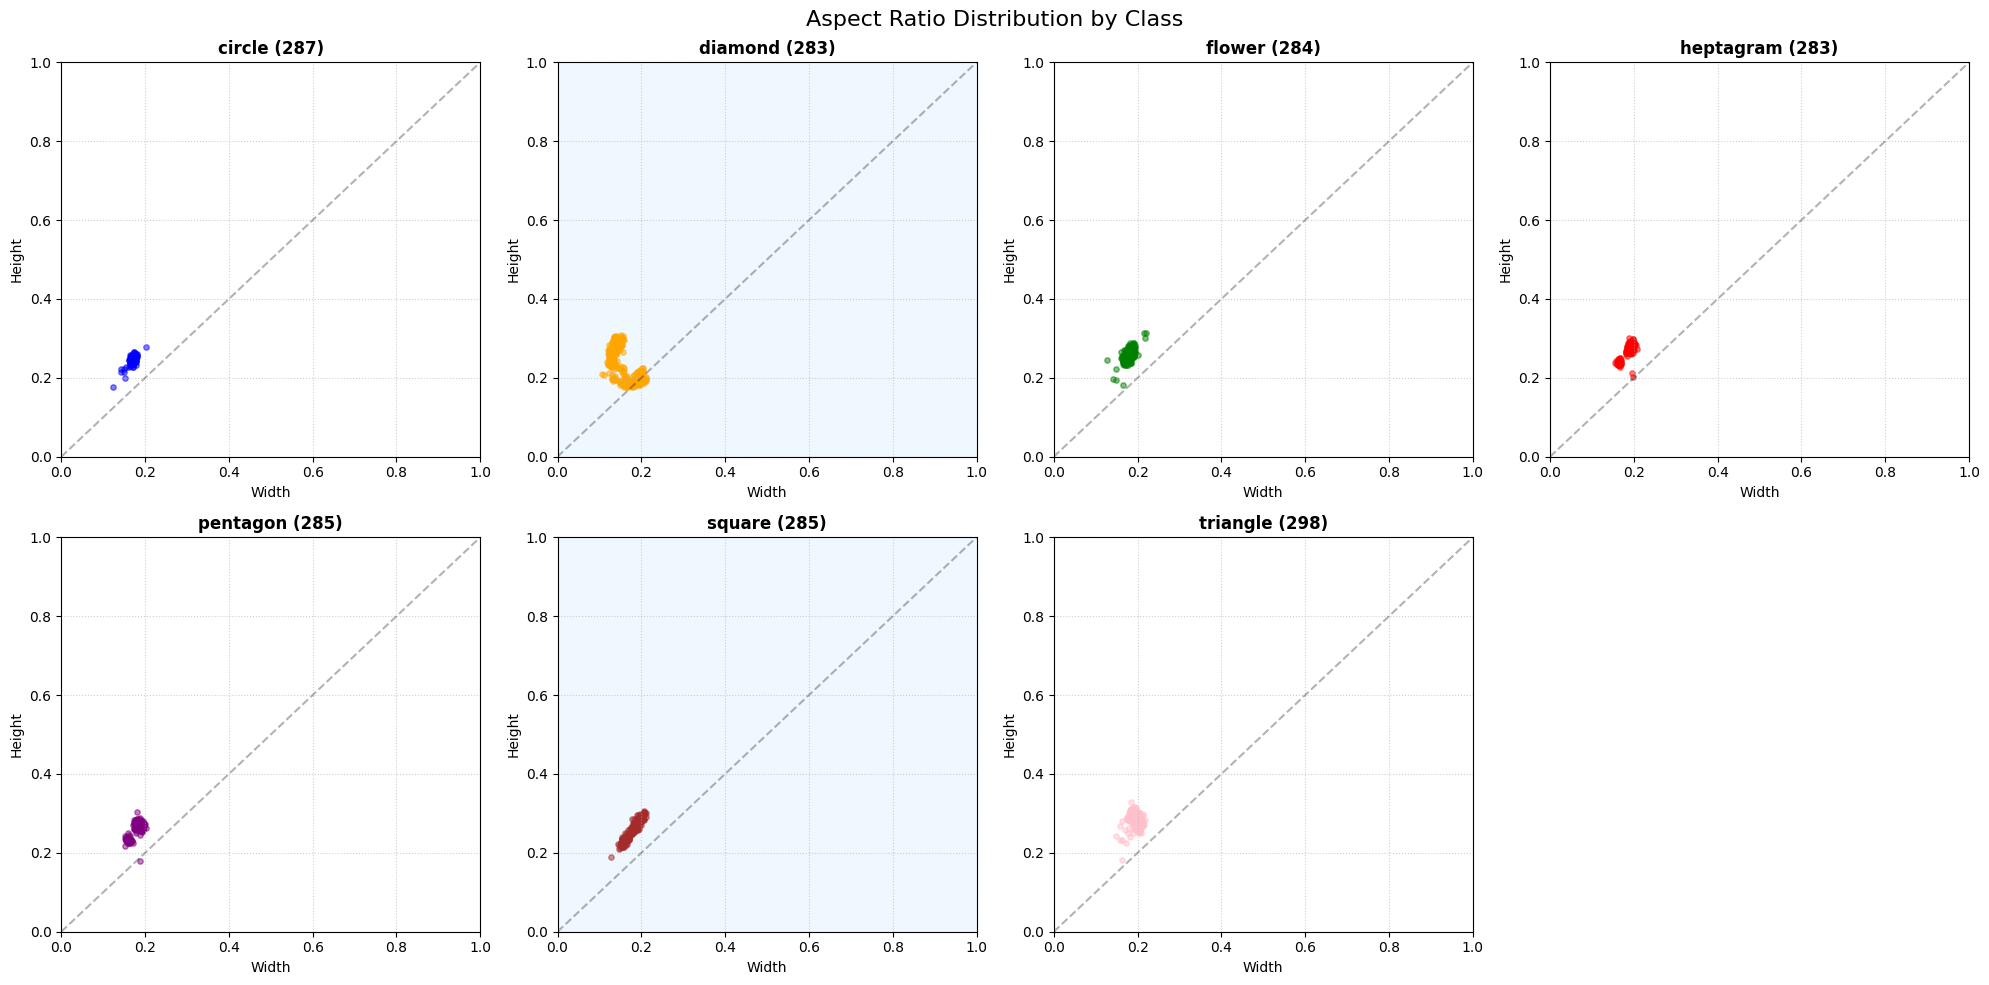

In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import math
import numpy as np  # Added for statistical calculations

# ================= CONFIGURATION =================
LABEL_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v19-ori-shape.yolov8\\all_labels"  # <--- REPLACE THIS
# Ensure this matches your classes.txt exactly
CLASS_NAMES =  ['circle', 'diamond', 'flower', 'heptagram', 'pentagon', 'square', 'triangle']
# =================================================

def plot_aspect_ratio_separate():
    label_files = glob.glob(os.path.join(LABEL_FOLDER, "*.txt"))
    
    if not label_files:
        print("No label files found! Check your path.")
        return

    # Store (width, height) for each class
    class_data = {name: [] for name in CLASS_NAMES}

    print(f"Scanning {len(label_files)} label files...")

    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    try:
                        class_id = int(parts[0])
                        # YOLO format: class x y w h
                        w = float(parts[3])
                        h = float(parts[4])
                        
                        if 0 <= class_id < len(CLASS_NAMES):
                            class_data[CLASS_NAMES[class_id]].append((w, h))
                    except ValueError:
                        continue

    # Determine grid size (e.g., for 7 classes, we need 2 rows x 4 cols = 8 slots)
    num_classes = len(CLASS_NAMES)
    cols = 4
    rows = math.ceil(num_classes / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to easy 1D array access

    # Define colors for distinction (optional)
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

    for i, class_name in enumerate(CLASS_NAMES):
        ax = axes[i]
        points = class_data[class_name]
        
        # Plot the dots
        if points:
            ws, hs = zip(*points)
            ax.scatter(ws, hs, alpha=0.5, color=colors[i % len(colors)], s=15)
        
        # Add the 1:1 Square Line (Reference)
        ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, label="1:1 Ratio")
        
        # Formatting
        ax.set_title(f"{class_name} ({len(points)})", fontsize=12, fontweight='bold')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_xlabel('Width')
        ax.set_ylabel('Height')
        ax.grid(True, linestyle=':', alpha=0.6)
        
        # Highlight the "Square vs Diamond" Check
        if class_name in ["square", "diamond"]:
            ax.set_facecolor('#f0f8ff') # Light blue background for attention

    # Hide empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('Aspect Ratio Distribution by Class', fontsize=16)
    plt.tight_layout()

    # ================= NEW: DATA TABLE GENERATION =================
    print("\n" + "="*95)
    print(f"{'Class Name':<15} | {'Count':<6} | {'Mean W':<8} | {'Mean H':<8} | {'Aspect Ratio (W/H)':<20} | {'Consistency (Std)':<15}")
    print("-" * 95)

    for name in CLASS_NAMES:
        points = class_data[name]
        if not points:
            print(f"{name:<15} | {'0':<6} | {'-':<8} | {'-':<8} | {'-':<20} | {'-':<15}")
            continue
        
        # Convert to numpy array for fast math
        pts_array = np.array(points)
        ws = pts_array[:, 0]
        hs = pts_array[:, 1]
        
        # Calculate Ratios (Width / Height)
        # Ratio = 1.0 means perfect square
        # Ratio > 1.0 means wide (Landscape)
        # Ratio < 1.0 means tall (Portrait)
        ratios = ws / hs 
        
        count = len(points)
        mean_w = np.mean(ws)
        mean_h = np.mean(hs)
        mean_ratio = np.mean(ratios)
        std_ratio = np.std(ratios) # Low std dev = Very consistent shape
        
        print(f"{name:<15} | {count:<6} | {mean_w:<8.3f} | {mean_h:<8.3f} | {mean_ratio:<20.3f} | {std_ratio:<15.3f}")
    
    print("="*95 + "\n")
    # ==============================================================

    plt.show()

if __name__ == "__main__":
    plot_aspect_ratio_separate()

Scanning dimensions of 405 images...


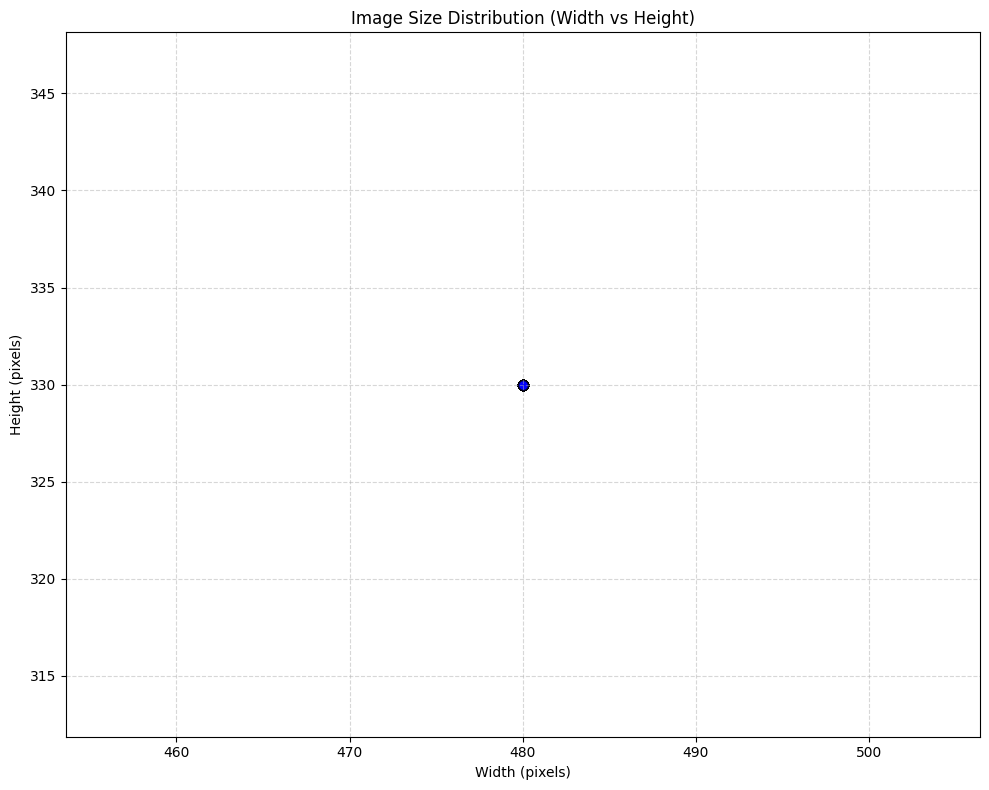


IMAGE SIZE STATISTICS
Total Images: 405
Max Size:     480x330
Min Size:     480x330
Average Size: 480x330

✅ PERFECT CONSISTENCY: All images are exactly the same size.


In [2]:
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image # Using Pillow to read sizes fast without loading pixel data

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v19-ori-shape.yolov8\\shapes"  # <--- REPLACE THIS
FILE_EXTENSION = "*.jpg"                # Check if you have .png or .jpg
# =================================================

def plot_image_sizes():
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found! Check your path.")
        return

    widths = []
    heights = []
    
    print(f"Scanning dimensions of {len(image_paths)} images...")

    for path in image_paths:
        try:
            with Image.open(path) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except Exception as e:
            print(f"Error reading {path}: {e}")

    # Plotting
    plt.figure(figsize=(10, 8))
    
    # Scatter plot
    # alpha=0.5 makes overlapping dots darker so you can see clusters
    plt.scatter(widths, heights, color='blue', alpha=0.5, edgecolors='k', s=50)
    
    plt.title('Image Size Distribution (Width vs Height)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Calculate averages for the report (but don't plot lines)
    avg_w = sum(widths) / len(widths)
    avg_h = sum(heights) / len(heights)
    
    plt.tight_layout()
    plt.show()

    # Console Report
    print("\n" + "="*40)
    print("IMAGE SIZE STATISTICS")
    print("="*40)
    print(f"Total Images: {len(widths)}")
    print(f"Max Size:     {max(widths)}x{max(heights)}")
    print(f"Min Size:     {min(widths)}x{min(heights)}")
    print(f"Average Size: {int(avg_w)}x{int(avg_h)}")
    
    # Check for consistency
    unique_sizes = set(zip(widths, heights))
    if len(unique_sizes) == 1:
        print("\n✅ PERFECT CONSISTENCY: All images are exactly the same size.")
    else:
        print(f"\n⚠️  VARIATION DETECTED: Found {len(unique_sizes)} different image sizes.")
        print("   (See graph to determine if they are clustered or chaotic)")

if __name__ == "__main__":
    plot_image_sizes()

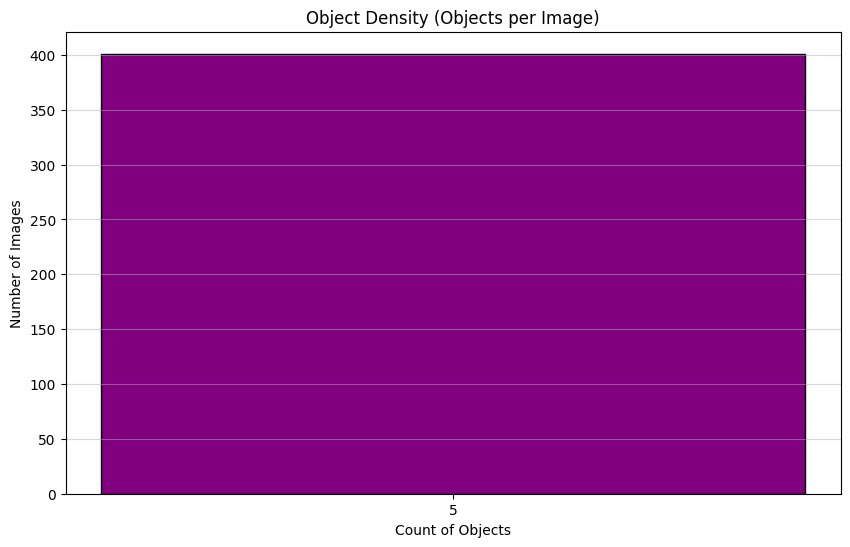

Average objects per image: 5.00


In [15]:
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
LABEL_FOLDER = "C:\\Users\\junha\\Downloads\\unpaired shape.v19-ori-shape.yolov8\\all_labels"  # <--- REPLACE THIS
# =================================================

def plot_objects_per_image():
    label_files = glob.glob(os.path.join(LABEL_FOLDER, "*.txt"))
    
    counts = []
    empty_files = []

    for file in label_files:
        with open(file, 'r') as f:
            # Count non-empty lines
            lines = [line.strip() for line in f.readlines() if line.strip()]
            count = len(lines)
            counts.append(count)
            
            if count == 0:
                empty_files.append(os.path.basename(file))
            
            if count == 4:
                print(f"File with exactly 4 objects: {os.path.basename(file)}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=range(min(counts), max(counts) + 2), align='left', color='purple', edgecolor='black')
    
    plt.title('Object Density (Objects per Image)')
    plt.xlabel('Count of Objects')
    plt.ylabel('Number of Images')
    plt.xticks(range(min(counts), max(counts) + 1))
    plt.grid(axis='y', alpha=0.5)
    plt.show()

    print(f"Average objects per image: {sum(counts)/len(counts):.2f}")
    if empty_files:
        print(f"Warning: Found {len(empty_files)} empty label files (Background images).")

if __name__ == "__main__":
    plot_objects_per_image()